# **Stepwise Model Selection**

Models can be compared based on preformance metrics such as:
- adjusted R-squared statistic,
- prediction error using cross validation,
- model scores such as AIC, BIC (smaller the better)

In general, we would like to have models that:
- are simple (few predictors/covariates)
- generalize well on unseen test data
- are interpretable

### How do we select a model among many available models that have these attributes?

One possible way to select the model is using the `"Forward Stepwise Selection".`

## Forward Stepwise Selection
1. Start with an intercept only model excluding any of the other predictor.

`Yhat = B0hat`
2. **Add** the single predictor that leads to the greatest reduction in the chosen model score (AIC / BIC).
3. Repeate step-2 until there is no improvement in the model score.

Here, we are adding the predictors sequentially and at each step checking what is the best predictor at that stage which is determined by using the notion of performance matrics (model score). We choose the predictor that results in the greatest reduction in the model scores. And we repeat the process until we see no improvement in the model score.

- Computational complexity is Quadratic in the number of predictors.

It is probablly not the best way to determine what the ideal model is.

## Backward Stepwise Selection:

1. We start with a model that includes all predictors.
2. **DELETE** the single predictor that leads to the greatest reduction in the chosen model score.
3. Repeat step-2 until there is no improvement in the model score.

- Computational complexity is again Quadratic in the numebr of predictors.

Backward stepwise cannot be used when the number of samples are less than or equal to tye number of predictors as the design matrix will have linearly dependent columns.

((((
  
- Matrix which has more columns than rows is gurantted to have its columns to be linearly dependent, so that the columns will not be linearly independent anymore.
- (X_transpose X)inverse is no more invertible so the OLSE cannot be calculated.

))))





### Let's look at this using the bodyfat dataset inside the mplot package

In [ ]:
install.packages(c("ggplot2", "dplyr", "mplot", "reshape", "leaps"))
library(ggplot2)
library(dplyr)
library(mplot)
library(reshape) # to melt the dataframe
library(leaps)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘grpreg’, ‘pls’, ‘rngtools’, ‘shape’, ‘RcppEigen’, ‘foreach’, ‘bestglm’, ‘doParallel’, ‘doRNG’, ‘plyr’, ‘shinydashboard’, ‘glmnet’, ‘googleVis’, ‘reshape2’



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘reshape’


The following object is masked from ‘package:dplyr’:

    rename




In [ ]:
# Loading bodyfat data
data('bofyfat', package = 'mplot')
bfData = bodyfat %>% select(-c('Id')) #removing Id column
str(bfData)

Warning message in data("bofyfat", package = "mplot"):
“data set ‘bofyfat’ not found”


'data.frame':	128 obs. of  14 variables:
 $ Bodyfat: num  6.3 11.3 14.2 14.8 8 11.5 15.4 15.1 17.3 22.1 ...
 $ Age    : int  54 50 24 55 51 54 58 34 28 35 ...
 $ Weight : num  70.4 73.7 70.8 76.9 62.3 ...
 $ Height : num  69.2 66.5 70.8 68.2 67.8 ...
 $ Neck   : num  37.5 38.7 35.7 37.2 36.5 37.4 38 36 35.6 40.5 ...
 $ Chest  : num  89.3 99.4 92.7 101.7 89.7 ...
 $ Abdo   : num  78.4 86.7 81.9 91.1 82 87.6 88.1 83.4 83.5 96.4 ...
 $ Hip    : num  96.1 96.2 95.3 97.1 89.1 ...
 $ Thigh  : num  56 62.1 56.4 56.6 49.3 59.7 57.1 52.4 57.3 69 ...
 $ Knee   : num  37.4 39.3 36.5 38.5 33.7 40.2 38.9 35.6 37.8 39 ...
 $ Ankle  : num  22.4 23.3 22 22.6 21.4 23.4 23.6 20.4 21.7 23.1 ...
 $ Bic    : num  32.6 30.6 33.5 33.4 29.6 27.9 30.9 28.3 32.2 36.1 ...
 $ Fore   : num  28.1 27.8 28.3 29.3 26 27 29.6 26.2 27.7 30.5 ...
 $ Wrist  : num  18.1 18.2 17.3 18.8 16.9 17.8 18 16.5 17.7 18.2 ...


In [ ]:
# Features in bfData
colnames(bfData)

[1] "Bodyfat" "Age"     "Weight"  "Height"  "Neck"    "Chest"   "Abdo"   
 [8] "Hip"     "Thigh"   "Knee"    "Ankle"   "Bic"     "Fore"    "Wrist"

## EDA

Using  as id variables



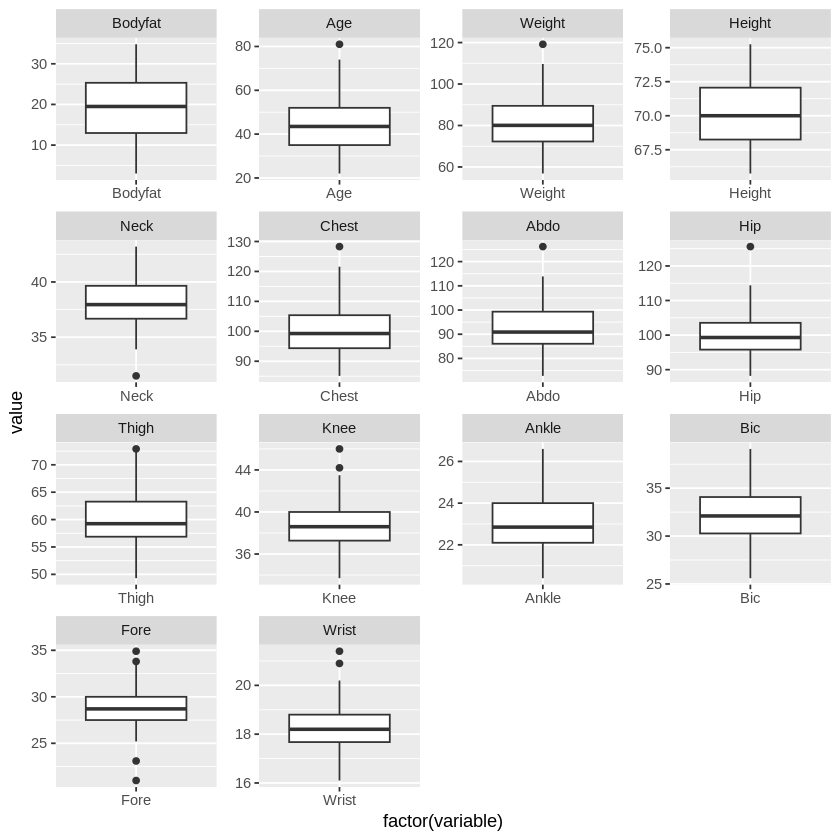

In [ ]:
# making a boxplot excluding the ID column
ggplot(data = melt(bfData), aes(x = factor(variable), y = value)) +
  geom_boxplot() +
    facet_wrap(~variable, scale = 'free')

Here, we can see boxplots that tell us what kind of distribution each one of these variables have. This explanatory plots helps us understand how the feature in the dataset look like.

# Building A Linear Regression Model

In [ ]:
# As abdominal circumference is a good indicator of bocy fat
model = lm(data = bfData, Bodyfat ~ Abdo)
summary(model)


Call:
lm(formula = Bodyfat ~ Abdo, data = bfData)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.3542  -2.9928   0.2191   2.4967  10.0106 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -43.19058    3.63431  -11.88   <2e-16 ***
Abdo          0.67411    0.03907   17.26   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.249 on 126 degrees of freedom
Multiple R-squared:  0.7027,	Adjusted R-squared:  0.7003 
F-statistic: 297.8 on 1 and 126 DF,  p-value: < 2.2e-16


We can see that the p-value is small which is a good sign with adjusted r-squared value being 0.70 meaning that 70% of variance in the dataset can be explained using the linear model as the abdominal circumference as the only predictor.

------

Lets create a model that includes all the features

In [ ]:
model2 = lm(data = bfData, Bodyfat ~ .)
summary(model2)


Call:
lm(formula = Bodyfat ~ ., data = bfData)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.3767 -2.5514 -0.1723  2.6391  9.1393 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -52.553646  40.062856  -1.312   0.1922    
Age           0.009288   0.043470   0.214   0.8312    
Weight       -0.271016   0.243569  -1.113   0.2682    
Height        0.258388   0.320810   0.805   0.4223    
Neck         -0.592669   0.322125  -1.840   0.0684 .  
Chest         0.090883   0.164738   0.552   0.5822    
Abdo          0.995184   0.123072   8.086 7.29e-13 ***
Hip          -0.141981   0.204533  -0.694   0.4890    
Thigh         0.101272   0.200714   0.505   0.6148    
Knee         -0.096682   0.325889  -0.297   0.7673    
Ankle        -0.048017   0.507695  -0.095   0.9248    
Bic           0.075332   0.244105   0.309   0.7582    
Fore          0.412107   0.272144   1.514   0.1327    
Wrist        -0.263067   0.745145  -0.353   0.7247    
---
Signif. codes:

We can see that the adjusted r-squared has only slightly improved from 70% to 72%. But most importantly we can see that many of the variables has the p-value bigger than any threshold we may use.

Therefore, we can see that id does not always have to be all the predictors in order to build the model. We have to have a methodical way of selecting the predictors in suach a way that the final model will be an optimal one.

## **How can we achieve this?**

### 1. Subset-Based Model Selection

In [ ]:
# Subset-based model selection using adjusted-R2 statistic (leaps package)
# lets create a matrix of predictors and a vector of response
X = as.matrix(bfData %>% select(-c(Bodyfat))) # matrix of covariates
y = as.matrix(bfData %>% select('Bodyfat')) # vector of response values

In [ ]:
# building a model using adjusted-R2 statistic (leaps package)
# names are names of predictors
model.leaps = leaps(X, y, names = names(bfData %>% select(-c('Bodyfat'))), method = 'adjr2')

This process is going to look into the matrix of covariates and it is going to select the subsets of covariates and then evaluate the adjusted R-squared value of the model built using those subsets of covariates.

From the list we can choose a model that has the best adjusted R-squared value.

In [ ]:
model.leaps$which

,Age,Weight,Height,Neck,Chest,Abdo,Hip,Thigh,Knee,Ankle,Bic,Fore,Wrist
1,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
1,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
1,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE
1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
1,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE


The first model has only one predictor. It uses Abdo. The second model uses Chese as the predictor variable and so on.

So the model is building all these subsets and evaluating the adjusted R-squared.

In [ ]:
model.leaps$adjr2

[1] 0.7003103 0.5409385 0.4331524 0.3887424 0.2673034 0.2355649 0.2317117
  [8] 0.2097995 0.1699403 0.1223512 0.7283166 0.7234042 0.7218486 0.7157205
 [15] 0.7138091 0.7129764 0.7104598 0.7064699 0.7050063 0.7015356 0.7355675
 [22] 0.7334295 0.7306060 0.7290234 0.7287145 0.7285792 0.7282872 0.7275612
 [29] 0.7274349 0.7266054 0.7383196 0.7372807 0.7347593 0.7345137 0.7344632
 [36] 0.7344201 0.7343928 0.7337552 0.7337145 0.7334859 0.7384589 0.7374079
 [43] 0.7373126 0.7371884 0.7371487 0.7367903 0.7364710 0.7364369 0.7363777
 [50] 0.7363144 0.7373086 0.7370175 0.7370069 0.7368746 0.7365968 0.7364867
 [57] 0.7364624 0.7364296 0.7363527 0.7360744 0.7355098 0.7354923 0.7354308
 [64] 0.7354261 0.7353752 0.7353332 0.7352945 0.7352854 0.7352766 0.7352563
 [71] 0.7341786 0.7339229 0.7338791 0.7337910 0.7336908 0.7336071 0.7335545
 [78] 0.7335225 0.7335147 0.7335114 0.7323186 0.7322610 0.7322442 0.7322340
 [85] 0.7322198 0.7319319 0.7317882 0.7317835 0.7317681 0.7317342 0.7303181
 [92] 0.7302336 0.7302325 0.7301935 0.7301587 0.7301336 0.7300658 0.7300283
 [99] 0.7299807 0.7299753 0.7281833 0.7280801 0.7280322 0.7280285 0.7280085
[106] 0.7279927 0.7279256 0.7279024 0.7278328 0.7278275 0.7259409 0.7258526
[113] 0.7257508 0.7257334 0.7256628 0.7253504 0.7252308 0.7248040 0.7244030
[120] 0.7229863 0.7235585

# **Forward Stepwise Regression**

### Forward stepwise selection using BIC

In [ ]:
# Forward stepwise selection using BIC
# Intercept-only model
model.lower = lm(data = bfData, Bodyfat ~ 1)
# Full model
model.upper = lm(data = bfData, Bodyfat ~ .)
model.step = step(model.lower, scope = list(lower = model.lower, upper = model.upper), direction = 'forward', k = log(128))
# k is the multiple of the number of degrees of freedom used for the penalty term which is log(n) for BIC and 2 for AIC
summary(model.step)
round(summary(model.step)$coef, 3)

Start:  AIC=528.45
Bodyfat ~ 1

         Df Sum of Sq    RSS    AIC
+ Abdo    1    5376.2 2274.9 378.05
+ Chest   1    4166.5 3484.7 432.63
+ Weight  1    3348.3 4302.9 459.63
+ Hip     1    3011.2 4640.0 469.28
+ Thigh   1    2089.3 5561.8 492.48
+ Bic     1    1848.4 5802.8 497.90
+ Knee    1    1819.1 5832.0 498.55
+ Neck    1    1652.8 5998.3 502.15
+ Wrist   1    1350.2 6300.9 508.45
+ Ankle   1     989.0 6662.2 515.58
+ Fore    1     886.5 6764.7 517.54
+ Age     1     495.1 7156.1 524.74
<none>                7651.2 528.45
+ Height  1     175.3 7475.8 530.33

Step:  AIC=378.05
Bodyfat ~ Abdo

         Df Sum of Sq    RSS    AIC
+ Weight  1   228.962 2046.0 369.32
+ Neck    1   191.968 2082.9 371.61
+ Hip     1   180.253 2094.7 372.33
+ Wrist   1   134.105 2140.8 375.12
+ Ankle   1   119.710 2155.2 375.98
+ Knee    1   113.440 2161.5 376.35
+ Thigh   1    94.488 2180.4 377.47
<none>                2274.9 378.05
+ Height  1    64.441 2210.5 379.22
+ Bic     1    53.419 2221.5 379.


Call:
lm(formula = Bodyfat ~ Abdo + Weight, data = bfData)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.1441 -2.5621 -0.0781  2.9580  9.0413 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -47.99121    3.69071  -13.00  < 2e-16 ***
Abdo          0.93880    0.07995   11.74  < 2e-16 ***
Weight       -0.24257    0.06486   -3.74 0.000279 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.046 on 125 degrees of freedom
Multiple R-squared:  0.7326,	Adjusted R-squared:  0.7283 
F-statistic: 171.2 on 2 and 125 DF,  p-value: < 2.2e-16


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-47.991,3.691,-13.003,0
Abdo,0.939,0.080,11.743,0
Weight,-0.243,0.065,-3.740,0


Here, we get the best model. It shows that abdomen circumference and weight are the only important predictors for predicting the far percentange with adjusted r-squared value being 72.8% approximately.

### Forward stepwise selection using AIC

In [ ]:
# Forward stepwise selection using AIC
# Intercept-only model
model.lower = lm(data = bfData, Bodyfat ~ 1)
# Full model
model.upper = lm(data = bfData, Bodyfat ~ .)
model.step = step(model.lower, scope = list(lower = model.lower, upper = model.upper), direction = 'forward', k = 2)
# k is the multiple of the number of degrees of freedom used for the penalty which is log(n) for BIC and 2 for AIC
summary(model.step)
round(summary(model.step)$coef, 3)

Start:  AIC=525.59
Bodyfat ~ 1

         Df Sum of Sq    RSS    AIC
+ Abdo    1    5376.2 2274.9 372.34
+ Chest   1    4166.5 3484.7 426.93
+ Weight  1    3348.3 4302.9 453.92
+ Hip     1    3011.2 4640.0 463.58
+ Thigh   1    2089.3 5561.8 486.77
+ Bic     1    1848.4 5802.8 492.20
+ Knee    1    1819.1 5832.0 492.84
+ Neck    1    1652.8 5998.3 496.44
+ Wrist   1    1350.2 6300.9 502.74
+ Ankle   1     989.0 6662.2 509.88
+ Fore    1     886.5 6764.7 511.83
+ Age     1     495.1 7156.1 519.03
+ Height  1     175.3 7475.8 524.63
<none>                7651.2 525.59

Step:  AIC=372.34
Bodyfat ~ Abdo

         Df Sum of Sq    RSS    AIC
+ Weight  1   228.962 2046.0 360.76
+ Neck    1   191.968 2082.9 363.06
+ Hip     1   180.253 2094.7 363.78
+ Wrist   1   134.105 2140.8 366.56
+ Ankle   1   119.710 2155.2 367.42
+ Knee    1   113.440 2161.5 367.79
+ Thigh   1    94.488 2180.4 368.91
+ Height  1    64.441 2210.5 370.66
+ Bic     1    53.419 2221.5 371.30
<none>                2274.9 372.


Call:
lm(formula = Bodyfat ~ Abdo + Weight + Neck + Fore, data = bfData)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.1637 -2.8476  0.0877  2.7522  8.3342 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -41.88325    8.30967  -5.040 1.62e-06 ***
Abdo          0.98046    0.08146  12.036  < 2e-16 ***
Weight       -0.22932    0.07868  -2.915  0.00423 ** 
Neck         -0.61856    0.26606  -2.325  0.02172 *  
Fore          0.43409    0.23834   1.821  0.07099 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.971 on 123 degrees of freedom
Multiple R-squared:  0.7466,	Adjusted R-squared:  0.7383 
F-statistic: 90.58 on 4 and 123 DF,  p-value: < 2.2e-16


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-41.883,8.310,-5.040,0.000
Abdo,0.980,0.081,12.036,0.000
Weight,-0.229,0.079,-2.915,0.004
Neck,-0.619,0.266,-2.325,0.022
Fore,0.434,0.238,1.821,0.071


We can see that this approach gives us 4 predictors with slightly better adjusted r-squared value at 73.83% approximately.

---

Now if we have to decide which model to choose the model based on adjusted r-squared we mat choose this model but there are other things to consider too. We also have to look at the interpretability of the model and also the complexity of the model.

So, putting into prespective,
- we can see that this model is uisng predictors like forehead circumference, neck circumference that probably are not very interpretable.
- Its also complex because it's using additional predictors.

Therefore, in this scenario, choosing the earlier model with just 2 covariates is the best decision.

-----

# Backward Stepwise Selection

In [ ]:
# Backward stepwise selection using BIC
# Intercept-only model
model.lower = lm(data = bfData, Bodyfat ~ 1)
# Full model
model.upper = lm(data = bfData, Bodyfat ~ .)
model.step = step(model.upper, scope = list(lower = model.lower, upper = model.upper), direction = 'backward', k = log(128))
summary(model.step)
round(summary(model.step)$coef, 3)

Start:  AIC=413.12
Bodyfat ~ Age + Weight + Height + Neck + Chest + Abdo + Hip + 
    Thigh + Knee + Ankle + Bic + Fore + Wrist

         Df Sum of Sq    RSS    AIC
- Ankle   1      0.15 1898.7 408.28
- Age     1      0.76 1899.3 408.32
- Knee    1      1.47 1900.1 408.37
- Bic     1      1.59 1900.2 408.38
- Wrist   1      2.08 1900.7 408.41
- Thigh   1      4.24 1902.8 408.56
- Chest   1      5.07 1903.7 408.61
- Hip     1      8.03 1906.6 408.81
- Height  1     10.80 1909.4 409.00
- Weight  1     20.62 1919.2 409.65
- Fore    1     38.19 1936.8 410.82
- Neck    1     56.38 1955.0 412.02
<none>                1898.6 413.12
- Abdo    1   1088.97 2987.6 466.30

Step:  AIC=408.28
Bodyfat ~ Age + Weight + Height + Neck + Chest + Abdo + Hip + 
    Thigh + Knee + Bic + Fore + Wrist

         Df Sum of Sq    RSS    AIC
- Age     1      0.84 1899.6 403.49
- Bic     1      1.90 1900.6 403.56
- Knee    1      1.92 1900.7 403.56
- Wrist   1      2.64 1901.4 403.61
- Thigh   1      4.15 1902.9 4


Call:
lm(formula = Bodyfat ~ Weight + Abdo, data = bfData)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.1441 -2.5621 -0.0781  2.9580  9.0413 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -47.99121    3.69071  -13.00  < 2e-16 ***
Weight       -0.24257    0.06486   -3.74 0.000279 ***
Abdo          0.93880    0.07995   11.74  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.046 on 125 degrees of freedom
Multiple R-squared:  0.7326,	Adjusted R-squared:  0.7283 
F-statistic: 171.2 on 2 and 125 DF,  p-value: < 2.2e-16


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-47.991,3.691,-13.003,0
Weight,-0.243,0.065,-3.740,0
Abdo,0.939,0.080,11.743,0


We get the same as the Forward stepwise selection.

In [ ]:
# Backward stepwise selection using AIC
# Intercept-only model
model.lower = lm(data = bfData, Bodyfat ~ 1)
# Full model
model.upper = lm(data = bfData, Bodyfat ~ .)
model.step = step(model.upper, scope = list(lower = model.lower, upper = model.upper), direction = 'backward', k = 2)
summary(model.step)
round(summary(model.step)$coef, 3)

Start:  AIC=373.2
Bodyfat ~ Age + Weight + Height + Neck + Chest + Abdo + Hip + 
    Thigh + Knee + Ankle + Bic + Fore + Wrist

         Df Sum of Sq    RSS    AIC
- Ankle   1      0.15 1898.7 371.21
- Age     1      0.76 1899.3 371.25
- Knee    1      1.47 1900.1 371.29
- Bic     1      1.59 1900.2 371.30
- Wrist   1      2.08 1900.7 371.34
- Thigh   1      4.24 1902.8 371.48
- Chest   1      5.07 1903.7 371.54
- Hip     1      8.03 1906.6 371.74
- Height  1     10.80 1909.4 371.92
- Weight  1     20.62 1919.2 372.58
<none>                1898.6 373.20
- Fore    1     38.19 1936.8 373.74
- Neck    1     56.38 1955.0 374.94
- Abdo    1   1088.97 2987.6 429.22

Step:  AIC=371.21
Bodyfat ~ Age + Weight + Height + Neck + Chest + Abdo + Hip + 
    Thigh + Knee + Bic + Fore + Wrist

         Df Sum of Sq    RSS    AIC
- Age     1      0.84 1899.6 369.26
- Bic     1      1.90 1900.6 369.33
- Knee    1      1.92 1900.7 369.33
- Wrist   1      2.64 1901.4 369.38
- Thigh   1      4.15 1902.9 36


Call:
lm(formula = Bodyfat ~ Weight + Neck + Abdo + Fore, data = bfData)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.1637 -2.8476  0.0877  2.7522  8.3342 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -41.88325    8.30967  -5.040 1.62e-06 ***
Weight       -0.22932    0.07868  -2.915  0.00423 ** 
Neck         -0.61856    0.26606  -2.325  0.02172 *  
Abdo          0.98046    0.08146  12.036  < 2e-16 ***
Fore          0.43409    0.23834   1.821  0.07099 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.971 on 123 degrees of freedom
Multiple R-squared:  0.7466,	Adjusted R-squared:  0.7383 
F-statistic: 90.58 on 4 and 123 DF,  p-value: < 2.2e-16


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-41.883,8.310,-5.040,0.000
Weight,-0.229,0.079,-2.915,0.004
Neck,-0.619,0.266,-2.325,0.022
Abdo,0.980,0.081,12.036,0.000
Fore,0.434,0.238,1.821,0.071


We again get the same model.

There are some **issues **with stepwise selection approaches. They are:
1. The same data is used throughout in both forward and backward stepwise selection approaches.
(Typically, this will result in an underestimate of the true prediction error of the model on unseen data.)
- **One way to avoid this issue:** The train-test-validation split of the dataset or cross-validation cna be used to address this.